# A* Motion Planning

In [1]:
# The autoreload extension will automatically load in new code as you edit files, 
# so you don't need to restart the kernel every time
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from P1_astar import DetOccupancyGrid2D, AStar
from utils import generate_planning_problem
from rrt_star import *

## Simple Environment
### Workspace
(Try changing this and see what happens)

In [2]:
width = 10
height = 10
obstacles = [((6,7),(8,8)),((2,2),(4,3)),((2,5),(4,7)),((6,3),(8,5))]
occupancy = DetOccupancyGrid2D(width, height, obstacles)

### Starting and final positions
(Try changing these and see what happens)

In [3]:
x_init = (1, 9)
x_goal = (9, 1)

### Run A* planning

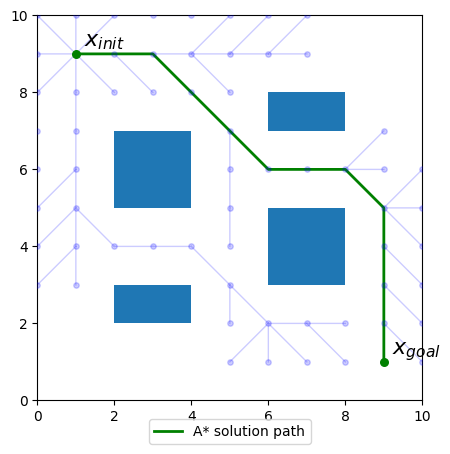

In [4]:
astar = AStar((0, 0), (width, height), x_init, x_goal, occupancy)
if not astar.solve():
    print("No path found")
else:
    plt.rcParams['figure.figsize'] = [5, 5]
    astar.plot_path()
    astar.plot_tree()

## RRT*

True

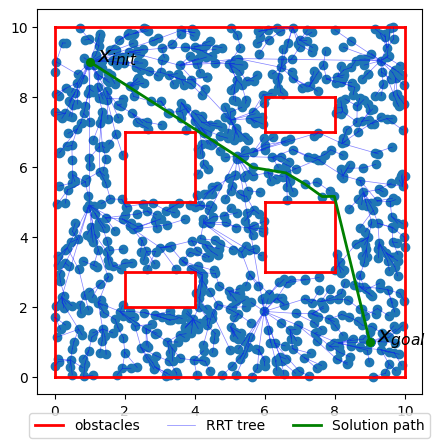

In [14]:
rrtstar = RRTStar([0,0], [width,height], x_init, x_goal, occupancy, free_motion_step=50)
rrtstar.solve(eps=5.0, max_iters=1000, goal_bias=0.05, search_radius=5.0, plot=True)

## Random Cluttered Environment
### Generate workspace, start and goal positions
(Try changing these and see what happens)

In [15]:
width = 100
height = 100
num_obs = 25
min_size = 5
max_size = 30

occupancy, x_init, x_goal = generate_planning_problem(width, height, num_obs, min_size, max_size)

### Run A* planning

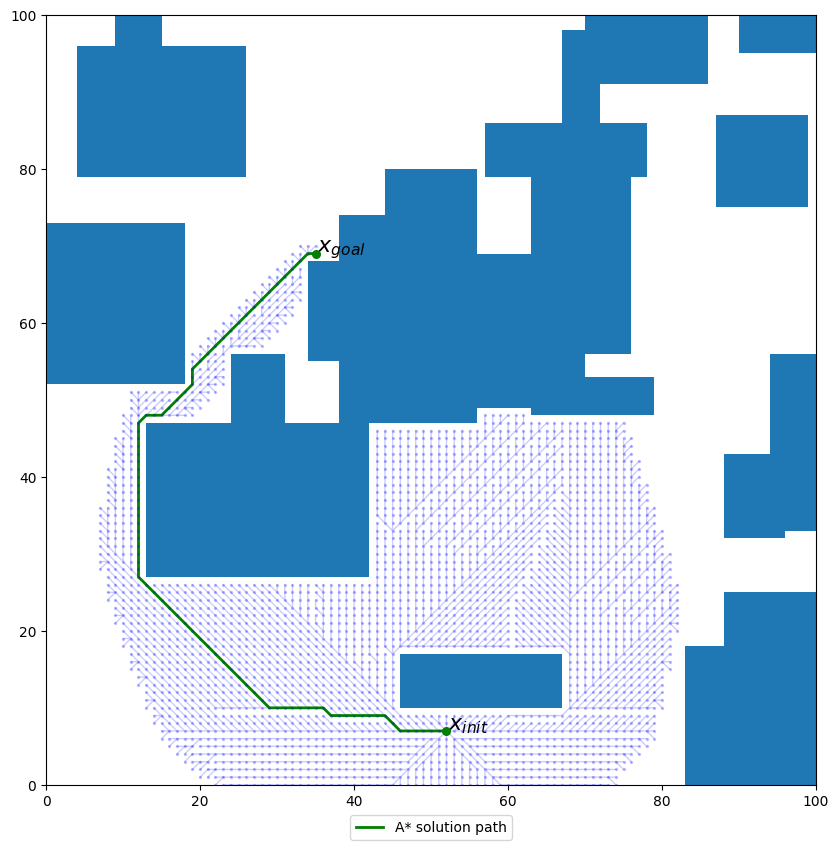

In [16]:
astar = AStar((0, 0), (width, height), x_init, x_goal, occupancy)
if not astar.solve():
    print("No path found")
else:
    plt.rcParams['figure.figsize'] = [10, 10]
    astar.plot_path()
    astar.plot_tree(point_size=2)